# COVID19

## Exploratory

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recover = pd.read_csv(url, error_bad_lines=False)

In [3]:
# Filter data for Brazil
confirmed = confirmed[confirmed['Country/Region'].str.contains("Brazil")]
death = death[death['Country/Region'].str.contains("Brazil")]
recover = recover[recover['Country/Region'].str.contains("Brazil")]

In [4]:
# Get population data
population = pd.read_csv('population.csv', sep=',', encoding='latin1')

confirmed = pd.merge(confirmed, population,how='left' ,on=['Country/Region','Country/Region'])
death = pd.merge(death, population,how='left' ,on=['Country/Region','Country/Region'])
recover = pd.merge(recover, population,how='left' ,on=['Country/Region','Country/Region'])
confirmed.head()

,Province/State_x,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,Province/State_y,Population
0,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,38,52,151,151,162,200,321,372.0,NaN,"209,300,000"


## Convert to time series

In [7]:
def create_ts(df):
    
    ts=df
    ts=ts.drop(['Province/State_x','Lat', 'Long',' Population '], axis=1)
    ts.set_index('Country/Region')
    ts=ts.T
    ts.columns=ts.loc['Country/Region']
    ts=ts.drop('Country/Region')
    ts=ts.fillna(0)
    ts=ts.reindex(sorted(ts.columns), axis=1)
    
    return (ts)

In [8]:
ts_conf = create_ts(confirmed)
ts_d = create_ts(death)
ts_rec = create_ts(recover)

Text(0.5, 1.0, 'Daily Total Confirmed - Brazil')

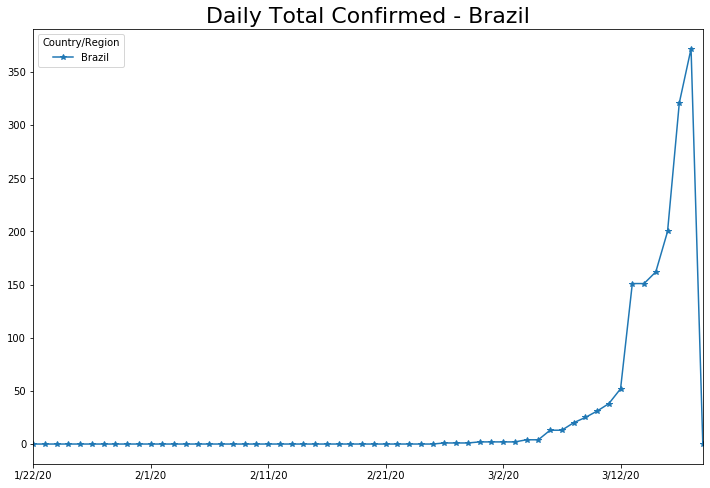

In [10]:
# Plot confirmed cases
p=ts_conf.reindex(ts_conf.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(12,8)).set_title('Daily Total Confirmed - Brazil',fontdict={'fontsize': 22})